In [1]:
import sklearn
sklearn.__version__

'0.20.0'

Warning: if you are using Scikit-Learn ≤ 0.19, the SVC class will use the One-vs-One (OvO) strategy by default, so you must explicitly set decision_function_shape="ovr" if you want to use the OvR strategy instead (OvR is the default since 0.19).

#_svm_clf = SVC(decision_function_shape="ovr", gamma="auto")   when sklearn.__version__<=0.19

In [2]:
import sys  
sys.version

'3.5.4 |Continuum Analytics, Inc.| (default, Aug 14 2017, 13:41:13) [MSC v.1900 64 bit (AMD64)]'

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(
        tree_clf,
        out_file = "iris_tree.dot",
        feature_names = iris.feature_names[2:],
        class_names =iris.target_names,
        rounded = True,
        filled = True
    )

In [1]:
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import plt
import numpy as np

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0],axes[1],100)
    x2s = np.linspace(axes[2],axes[3],100)
    x1,x2 = np.meshgrid(x1s,x2s)
    X_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if plot_training:
        plt.plot(X[:,0][y==0],X[:,1][y==0],"bs",label="Iris-Setosa")
        plt.plot(X[:,0][y==1],X[:,1][y==1],"y^",label="Iris-Versicolor")
        plt.plot(X[:,0][y==2],X[:,1][y==2],"ro",label="Iris-Virginica")
        plt.axis(axes)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

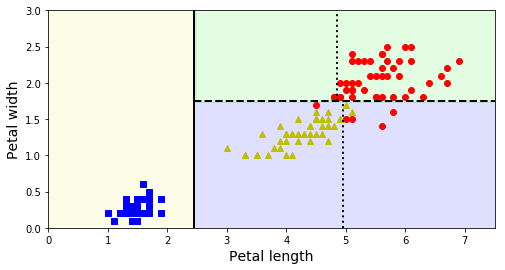

In [6]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)

In [7]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
tree_clf.predict([[5,1.5]])

array([1])

# 基尼指数的计算

## 在叶节点上的Gini系数
$$G_{i} = 1-\sum _{k=1}^{n}P_{i,k}^{2}$$

## 集合D使用特征A进行分类后的基尼系数
$$G(D,A) = \frac{\left |G_{L} \right |}{\left | G \right | }Gini(D_{L})+\frac{\left |G_{R} \right |}{\left | G \right | }Gini(D_{R})$$ 选取最小Gini指数

In [9]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [10]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)]

array([[4.8, 1.8]])

In [11]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

当训练集中的数据剔除 y=2时 width！=1.8的情况  模型就会变得不同

In [12]:
not_widest_versicolor

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [13]:
y_tweaked

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

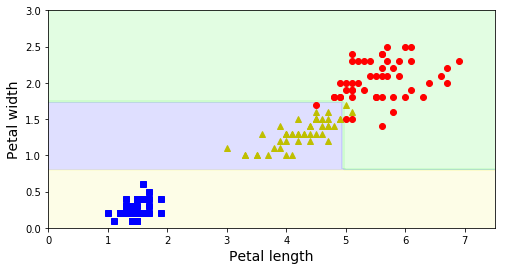

In [14]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=3, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
# plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
# plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
# plt.text(1.0, 0.9, "Depth=0", fontsize=15)
# plt.text(1.0, 1.80, "Depth=1", fontsize=13)

#save_fig("decision_tree_instability_plot")
plt.show()

In [15]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

In [16]:
deep_tree_Clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_Clf2 = DecisionTreeClassifier(random_state=42,min_samples_leaf=4)

deep_tree_Clf1.fit(Xm,ym)
deep_tree_Clf2.fit(Xm,ym)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

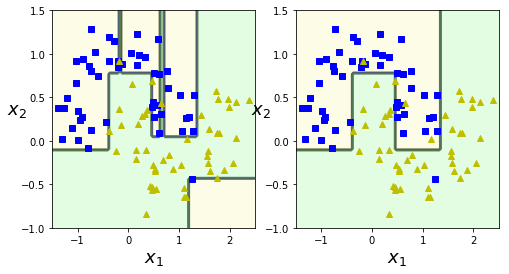

In [17]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_Clf1, Xm, ym, iris=False,axes=[-1.5, 2.5, -1, 1.5])

plt.subplot(122)
plot_decision_boundary(deep_tree_Clf2, Xm, ym, iris=False,axes=[-1.5, 2.5, -1, 1.5])

In [18]:
np.random.seed(42)
m=200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [24]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 2)
tree_reg.fit(X,y)

tree_reg2 = DecisionTreeRegressor(max_depth = 3)
tree_reg2.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [25]:
from sklearn.tree import export_graphviz
export_graphviz(
        tree_reg,
        out_file = "regression_tree.dot",
        feature_names = ["X1"],
        #class_names =iris.target_names,
        rounded = True,
        filled = True
    )

In [26]:
def plot_regressiontree_result(tree_reg,X,y,axes):
    x1s = np.linspace(axes[0],axes[1],400)
    y_pred = tree_reg.predict(x1s.reshape(400,1))
    
    plt.plot(x1s,y_pred,"r-",label="$\hat{y}$")
    plt.plot(X,y,"b.")
    plt.axis(axes)
    
    plt.legend(loc="lower right")

Text(0.5,1,'max_depth=3')

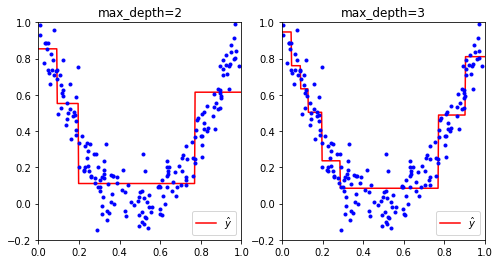

In [27]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_regressiontree_result(tree_reg,X,y,[0,1,-0.2,1])
plt.title("max_depth=2")

plt.subplot(122)
plot_regressiontree_result(tree_reg2,X,y,[0,1,-0.2,1])
plt.title("max_depth=3")

In [28]:
tree_reg3 = DecisionTreeRegressor()
tree_reg3.fit(X,y)

tree_reg4 = DecisionTreeRegressor(min_samples_leaf= 10)
tree_reg4.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Text(0.5,1,'min_samples_leaf')

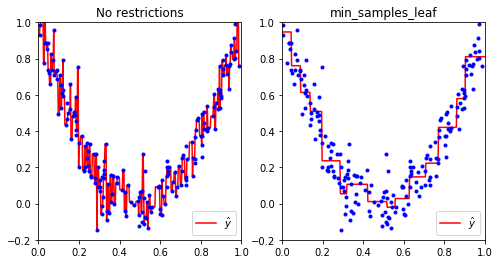

In [29]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_regressiontree_result(tree_reg3,X,y,[0,1,-0.2,1])
plt.title("No restrictions")

plt.subplot(122)
plot_regressiontree_result(tree_reg4,X,y,[0,1,-0.2,1])
plt.title("min_samples_leaf")

决策树的特点：
>1.不稳定性
    决策树倾向于设定正交化的决策边界（所有边界和轴垂直），这使得它敏感于数据集的旋转。需要使用PCA主成分分析来缓解这种情况

>2.利于解释说明

>3.计算复杂度：在预测时非常快  对数级别（在大数据量时也很快）

>4.使用信息熵和基尼系数度量分类结果 选取分类指标

In [32]:
tree_reg3.max_depth

In [35]:
tree_reg3.tree_

In [36]:
X,y=make_moons(n_samples=10000,noise=0.4)

In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
# from sklearn import tree

# with open("tree_reg3.dot", 'w') as f:
#     f = tree.export_graphviz(tree_reg3, out_file=f)
from sklearn.model_selection import GridSearchCV

params = {"max_leaf_nodes":list(range(2,100)),'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    0.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': [2, 3, 4], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       s

In [57]:
grid_search_cv.best_params_

{'max_leaf_nodes': 11, 'min_samples_split': 2}

In [58]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=11,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [59]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_pred,y_test)

0.849

In [60]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [72]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]
accuracy_scores = []
    
for tree,(X_mini_train,y_mini_train) in zip(forest,mini_sets):
    tree.fit(X_mini_train,y_mini_train)
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_pred,y_test))
np.mean(accuracy_scores)

0.8085765000000001